In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [166]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')

In [167]:
df.head()

,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,company_founded,...,r,java,scala,sql,spark,aws,azure,airflow,snowflake,git
0,Tecolote Research\r\n,Data Scientist,"Albuquerque, NM","Data Scientist\r\nLocation: Albuquerque, NM\r\...",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,1973,...,1,0,0,0,0,0,0,0,0,0
1,University of Maryland Medical System\r\n,Healthcare Data Scientist,"Linthicum, MD",What You Will Do:\r\n\r\nI. General Summary\r\...,87.5,10000+ employees,Other Organization,Health Care,Health Care Services & Hospitals,1984,...,1,1,0,0,0,0,0,0,0,0
2,KnowBe4\r\n,Data Scientist,"Clearwater, FL","KnowBe4, Inc. is a high growth information sec...",85.0,501 to 1000 employees,Company - Private,Business Services,Security Services,2010,...,1,0,0,1,1,0,0,0,0,0
3,PNNL\r\n,Data Scientist,"Richland, WA",*Organization and Job ID**\r\nJob ID: 310709\r...,76.5,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",Energy,1965,...,1,0,0,0,0,0,0,0,0,0
4,Affinity Solutions\r\n,Data Scientist,"New York, NY",Data Scientist\r\nAffinity Solutions / Marketi...,114.5,51 to 200 employees,Company - Private,Business Services,Advertising & Marketing,1998,...,1,0,0,1,0,0,0,0,0,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           457 non-null    object 
 1   job title         457 non-null    object 
 2   location          457 non-null    object 
 3   job description   457 non-null    object 
 4   salary estimate   457 non-null    float64
 5   company_size      457 non-null    object 
 6   company_type      457 non-null    object 
 7   company_sector    457 non-null    object 
 8   company_industry  457 non-null    object 
 9   company_founded   457 non-null    int64  
 10  state code        457 non-null    object 
 11  company_age       457 non-null    int64  
 12  python            457 non-null    int64  
 13  r                 457 non-null    int64  
 14  java              457 non-null    int64  
 15  scala             457 non-null    int64  
 16  sql               457 non-null    int64  
 1

In [169]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'date scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'Junior'
    else :
        return 'na'


In [170]:
#Simplify Job title and seniority
df['job title simp'] = df['job title'].apply(title_simplifier)
df['seniority'] = df['job title'].apply(seniority)

In [171]:
df['job title simp'].value_counts()


date scientist    192
na                 92
data engineer      75
data analyst       67
manager            12
ml engineer        11
director            8
Name: job title simp, dtype: int64

In [172]:
df['seniority'].value_counts()

na        335
Senior    119
Junior      3
Name: seniority, dtype: int64

In [173]:
df_jobs = df['job title'].value_counts().reset_index().rename(columns ={'index': 'job title', 'job title':'number'})
df_jobs = df_jobs.iloc[0:10,:]
df_jobs

,job title,number
0,Data Scientist,100
1,Data Engineer,37
2,Senior Data Scientist,22
3,Data Analyst,13
4,Senior Data Engineer,10
5,Senior Data Analyst,10
6,Lead Data Scientist,5
7,Research Scientist,4
8,Principal Data Scientist,3
9,Machine Learning Engineer,3


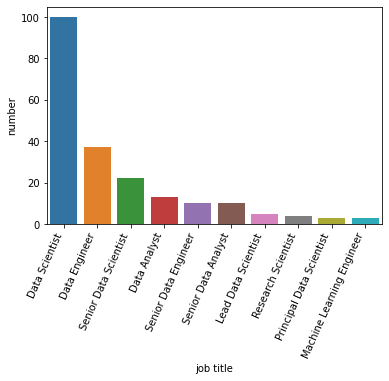

In [174]:
sns.barplot(data = df_jobs, x='job title', y='number')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()

In [175]:
df_salaries = df.groupby('job title').agg({'salary estimate': 'mean'}).reset_index()
df_salaries.sort_values('salary estimate', ascending = False, inplace = True)
df_salaries = df_salaries.iloc[0:10,:]
df_salaries

,job title,salary estimate
92,"Director II, Data Science - GRM Actuarial",254.0
136,Principal Machine Learning Scientist,232.5
135,Principal Data Scientist with over 10 years ex...,225.0
114,Lead Data Engineer,205.0
93,"Director II, Data Science - GRS Predictive Ana...",194.5
240,Staff Machine Learning Engineer,181.0
94,"Director, Data Science",179.5
65,Data Science Manager,174.5
224,Senior Scientist II,174.0
212,Senior Quantitative Analyst,173.0


In [176]:
df_salaries = df.groupby('job title').agg({'salary estimate': 'mean'}).reset_index()
df_salaries.sort_values('salary estimate', ascending = False, inplace = True)
df_salaries = df_salaries.iloc[0:10,:]
df_salaries

,job title,salary estimate
92,"Director II, Data Science - GRM Actuarial",254.0
136,Principal Machine Learning Scientist,232.5
135,Principal Data Scientist with over 10 years ex...,225.0
114,Lead Data Engineer,205.0
93,"Director II, Data Science - GRS Predictive Ana...",194.5
240,Staff Machine Learning Engineer,181.0
94,"Director, Data Science",179.5
65,Data Science Manager,174.5
224,Senior Scientist II,174.0
212,Senior Quantitative Analyst,173.0


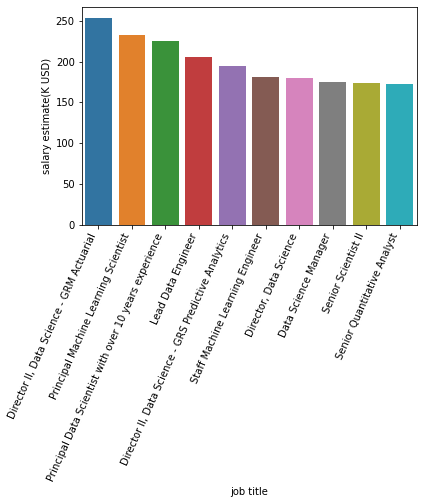

In [177]:
ax = sns.barplot(data = df_salaries, x='job title', y='salary estimate')
ax.set(ylabel='salary estimate(K USD)')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()

In [178]:
df_salaries_sector = df[df['company_sector']!='-1'].groupby('company_sector').agg({'salary estimate': 'mean'}).reset_index()
df_salaries_sector.sort_values('salary estimate', ascending = False, inplace = True)
df_salaries_sector = df_salaries_sector.iloc[0:10,:]
df_salaries_sector

,company_sector,salary estimate
14,Media,117.400000
4,Biotech & Pharmaceuticals,114.614754
0,Accounting & Legal,113.500000
11,Information Technology,110.451613
19,Retail,104.750000
18,Real Estate,103.400000
7,Education,102.535714
15,Mining & Metals,102.500000
20,Telecommunications,102.333333
12,Insurance,101.792683


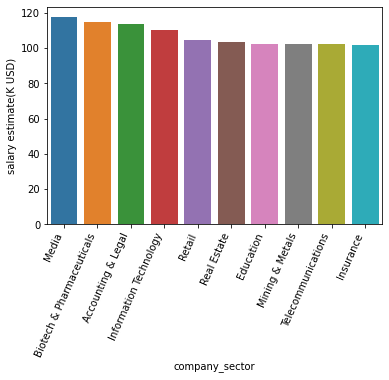

In [179]:
ax  = sns.barplot(data = df_salaries_sector, x='company_sector', y='salary estimate')
ax.set(ylabel='salary estimate(K USD)')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()

In [180]:
df_salaries_state = df.groupby('state code').agg({'salary estimate': 'mean'}).reset_index()
df_salaries_state.sort_values('salary estimate', ascending = False, inplace = True)
df_salaries_state = df_salaries_state.iloc[0:10,:]
df_salaries_state

,state code,salary estimate
2,CA,124.449495
10,IL,112.295455
5,DC,110.166667
15,MA,107.275862
17,MI,104.500000
22,NJ,102.346154
24,NY,100.234043
28,RI,100.000000
30,TN,100.000000
20,NC,99.181818


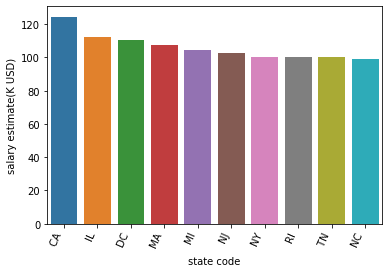

In [181]:
ax  = sns.barplot(data = df_salaries_state, x='state code', y='salary estimate')
ax.set(ylabel='salary estimate(K USD)')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()

In [182]:
df.columns

Index(['company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'state code', 'company_age',
       'python', 'r', 'java', 'scala', 'sql', 'spark', 'aws', 'azure',
       'airflow', 'snowflake', 'git', 'job title simp', 'seniority'],
      dtype='object')

In [213]:
df_skills = df.loc[:,"python":"git"].agg(sum)
df_skills.sort_values(ascending=False, inplace=True)
df_skills = df_skills.to_frame().reset_index().rename(columns={'index':'tech',0:'score' })
df_skills

,tech,score
0,r,457
1,python,260
2,sql,255
3,spark,111
4,aws,110
5,git,108
6,scala,104
7,java,100
8,azure,37
9,snowflake,17


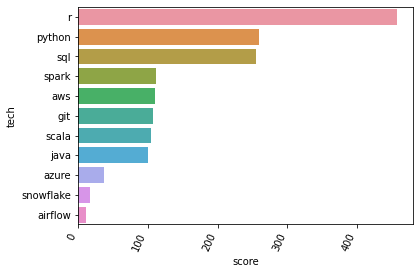

In [214]:
ax  = sns.barplot(data = df_skills, x='score', y='tech')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()